- Index.csv : specifies the patients having slice-level and lobe-level labels. The indices given to patients in “Index.csv” file are then used in “Slice-level-labels.npy” and “Lobe-level-labels.npy” to indicate the slice and lobe labels.
<br>
- Slice-level-labels.npy : a 2D binary Numpy array in which the existence of infection in a specific slice is indicated by 1 and the lack of infection is shown by 0. The first dimension represents the case index and the second one represents the slice numbers.
<br>
- Lobe-level-labels.npy : a 3D binary Numpy array in which the existence of infection in a specific lobe and slice is determined by 1 in the corresponding element of the array. Like the slice-level array. The two first dimensions represent the case index and slice numbers respectively. The third dimension shows the lobe indices which are specified as follows:
    - 0 : Left Lower Lobe (LLL)
    - 1 : Left Upper Lobe (LUL)
    - 2 : Right Lower Lobe (RLL)
    - 3 : Right Middle Lobe (RML)
    - 4 : Right Upper Lobe (RUL)

<br> 
**IMPORTANT:**
While reading DICOM files, note that the correct order of slices in a CT scan doesn’t necessarily follow the order of the Slice-IDs. It’s recommended to use the slice location value to sort the slices. Otherwise, the labels will not match correctly to the images. The “Slice Location” value is stored in DICOM files and is accessible through the following DICOM tag: 
(0020,1041) - DS - Slice Location

In [43]:
import sys ,os, importlib
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

import utils as Utils
importlib.reload(Utils)
import numpy as np
import configparser
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread


config = configparser.ConfigParser()
config.read("../../config.ini")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)



In [18]:
COVID_CT_MD_PATH = config["PATHS"]["COVID_CT_MD_PATH"]
metadata_summary_df = pd.read_csv(os.path.join(os.path.dirname(COVID_CT_MD_PATH), "metadata summary.csv"))
clinical_data_df = pd.read_csv(os.path.join(COVID_CT_MD_PATH, "Clinical-data.csv"), header=1)
index_df = pd.read_csv(os.path.join(COVID_CT_MD_PATH, "Index.csv"))
radiologist_separated_labels_df = pd.read_csv(os.path.join(COVID_CT_MD_PATH, "Radiogists-seperated-labels.csv"))
slice_level_labels = np.load(os.path.join(COVID_CT_MD_PATH, "Slice-level-labels.npy"), allow_pickle=True)
lobe_level_labels = np.load(os.path.join(COVID_CT_MD_PATH, "Lobe-level-labels.npy"), allow_pickle=True)

In [3]:
metadata_summary_df.head()

,Measurement(s),Low Dose Computed Tomography of the Chest • viral infectious disease
0,Technology Type(s),digital curation • image processing technique
1,Factor Type(s),sex • gender • age group • weight • clinical characteristics • covid-19 RT-PCR result • follow-up data
2,Sample Characteristic - Organism,Homo sapiens


In [5]:
clinical_data_df.head()

,Unnamed: 0,Diagnosis,Folder,Patient Gender,Patient Age,Weight,Clinical characteristics,Surgery,Follow-up,PCR
0,0,COVID-19,P001,M,039Y,80.0,"Dyspnea, Cough, Fever",NaN,NaN,NaN
1,1,COVID-19,P002,F,048Y,75.0,"Dyspnea, Flu-like symptoms",No,Uneventful,NaN
2,2,COVID-19,P003,M,068Y,90.0,Cough,NaN,Hospitalized,NaN
3,3,COVID-19,P004,M,065Y,75.0,"Dyspnea, fever",No,Uneventful,NaN
4,4,COVID-19,P005,M,029Y,78.0,"Cough, Fatigue",No,Uneventful,NaN


In [44]:
print(index_df["Diagnosis"].value_counts())
index_df.head(79)

Diagnosis
COVID-19    54
CAP         25
Name: count, dtype: int64


,Label Index,Diagnosis,Relative Path,Folder/ID,patient_id,label,label_index
0,0,COVID-19,./COVID-19/,P001,1,covid,0
1,1,COVID-19,./COVID-19/,P002,2,covid,1
2,2,COVID-19,./COVID-19/,P003,3,covid,2
3,3,COVID-19,./COVID-19/,P004,4,covid,3
4,4,COVID-19,./COVID-19/,P005,5,covid,4
5,5,COVID-19,./COVID-19/,P006,6,covid,5
6,6,COVID-19,./COVID-19/,P007,7,covid,6
7,7,COVID-19,./COVID-19/,P008,8,covid,7
8,8,COVID-19,./COVID-19/,P009,9,covid,8
9,9,COVID-19,./COVID-19/,P010,10,covid,9


In [7]:
radiologist_separated_labels_df.head()

,ID,Radiologist #1,Radiologist #2,Radiologist #3
0,P001,COVID,COVID,COVID
1,P002,COVID,COVID,COVID
2,P003,COVID,COVID,COVID
3,P004,COVID,COVID,COVID
4,P005,COVID,COVID,COVID


In [4]:
print(slice_level_labels.shape)
print(slice_level_labels[0])

(79, 200)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
import os
import pandas as pd
root_dir = COVID_CT_MD_PATH

# Define the list of folders to iterate through
folders = ['Normal Cases', 'Cap Cases', 'COVID-19 Cases']

# Initialize an empty list to store the data
data = []

# Iterate through each folder
for folder in folders:
    folder_path = os.path.join(root_dir, folder)
    
    # Iterate through each patient folder
    for patient_folder in os.listdir(folder_path):
        if patient_folder.startswith('.'):
            continue
        #remove all non numerical characters
        patient_id = ''.join(filter(str.isdigit, patient_folder))
        
        # Iterate through each .dcm file
        dcm_slices_list = os.listdir(os.path.join(folder_path, patient_folder))
        n_slices = len(dcm_slices_list)
        for file_name in dcm_slices_list:
            if file_name.endswith('.dcm'):
                slice_number = file_name.split('.dcm')[0].split('IM0')[1]
                file_path = os.path.join(folder_path, patient_folder, file_name)
                
                # Determine the label based on the folder name
                if folder == 'Normal Cases':
                    label = 'normal'
                elif folder == 'Cap Cases':
                    label = 'common-pneumonia'
                else:
                    label = 'covid'
                
                # Append the data to the list
                data.append({'patient_id': int(patient_id), 'label': label, 'slice_index': int(slice_number), "n_slices": int(n_slices), 'ct_slice_path': file_path})

# Create a dataframe from the collected data
ct_slices_df = pd.DataFrame(data)
index_df["patient_id"] = index_df["Folder/ID"].apply(lambda x: ''.join(filter(str.isdigit, x))).astype(int)
index_df["label"] = index_df["Diagnosis"].apply(lambda x: "common-pneumonia" if x == "CAP" else "covid")
index_df["label_index"] = index_df["Label Index"].astype(int)
index_df["label_index"] = index_df["label_index"].apply(lambda x: x - 1 if x > 42 else x)
enriched_index_df = index_df[["patient_id", "label_index", "label"]]
ct_slices_with_labels_df = ct_slices_df.merge(enriched_index_df, on=["patient_id", "label"], how="left")
ct_slices_with_labels_df.head()

,patient_id,label,slice_index,n_slices,ct_slice_path,label_index
0,55,normal,107,144,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/Normal Cases/normal055/IM0107.dcm,NaN
1,55,normal,95,144,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/Normal Cases/normal055/IM0095.dcm,NaN
2,55,normal,5,144,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/Normal Cases/normal055/IM0005.dcm,NaN
3,55,normal,128,144,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/Normal Cases/normal055/IM0128.dcm,NaN
4,55,normal,17,144,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/Normal Cases/normal055/IM0017.dcm,NaN


In [40]:
print(slice_level_labels[0])
print(np.where(slice_level_labels[0] > 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(array([26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 72, 73, 74, 75, 90, 91, 92,
       93, 94, 95, 96, 97]),)


In [ ]:
slice_level_labels[[13-1][]]

In [53]:
ct_slices_with_labels_df["has_infection"] = ct_slices_with_labels_df.apply(
    lambda row: False if pd.isna(row["label_index"]) else (True if slice_level_labels[int(row["label_index"])][int(row["slice_index"])-1] > 0 else False), axis=1)

ct_slices_with_labels_df[(ct_slices_with_labels_df["patient_id"]==1) & (ct_slices_with_labels_df["label"]=="covid")].sort_values("slice_index").iloc[20:40].head(20)

,patient_id,label,slice_index,n_slices,ct_slice_path,label_index,has_infection
36604,1,covid,21,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0021.dcm,0.0,False
36578,1,covid,22,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0022.dcm,0.0,False
36697,1,covid,23,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0023.dcm,0.0,False
36662,1,covid,24,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0024.dcm,0.0,False
36579,1,covid,25,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0025.dcm,0.0,False
36619,1,covid,26,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0026.dcm,0.0,False
36586,1,covid,27,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0027.dcm,0.0,True
36582,1,covid,28,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0028.dcm,0.0,True
36626,1,covid,29,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0029.dcm,0.0,True
36639,1,covid,30,148,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_CT_MD/COVID-CT-MD/COVID-19 Cases/P001/IM0030.dcm,0.0,True


# Visualization

In [70]:
# Define the number of DICOMs to read
num_dicoms = 20

# Iterate through the first num_dicoms rows of the dataframe
for index, row in df.head(num_dicoms).iterrows():
    # Read the DICOM file
    dcm = pydicom.dcmread(row['ct_slice_path'])
    # Print the slice location, window level, and window width
    print(f"Slice Location: {dcm.SliceLocation}")
    print(f"Window Level: {dcm.WindowCenter}")
    print(f"Window Width: {dcm.WindowWidth}")
    print(f"Explaination: {dcm.WindowCenterWidthExplanation}")
    print(f"Min Value: {dcm.pixel_array.min()}")
    print(f"Max Value: {dcm.pixel_array.max()}")


Slice Location: -249.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2325
Slice Location: -225.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2284
Slice Location: -45.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2580
Slice Location: -291.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2513
Slice Location: -69.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2561
Slice Location: -103.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2520
Slice Location: -57.2
Window Level: [50, -600]
Window Width: [350, 1200]
Explaination: ['WINDOW1', 'WINDOW2']
Min Value: 0
Max Value: 2578
Slice Location: -203.2


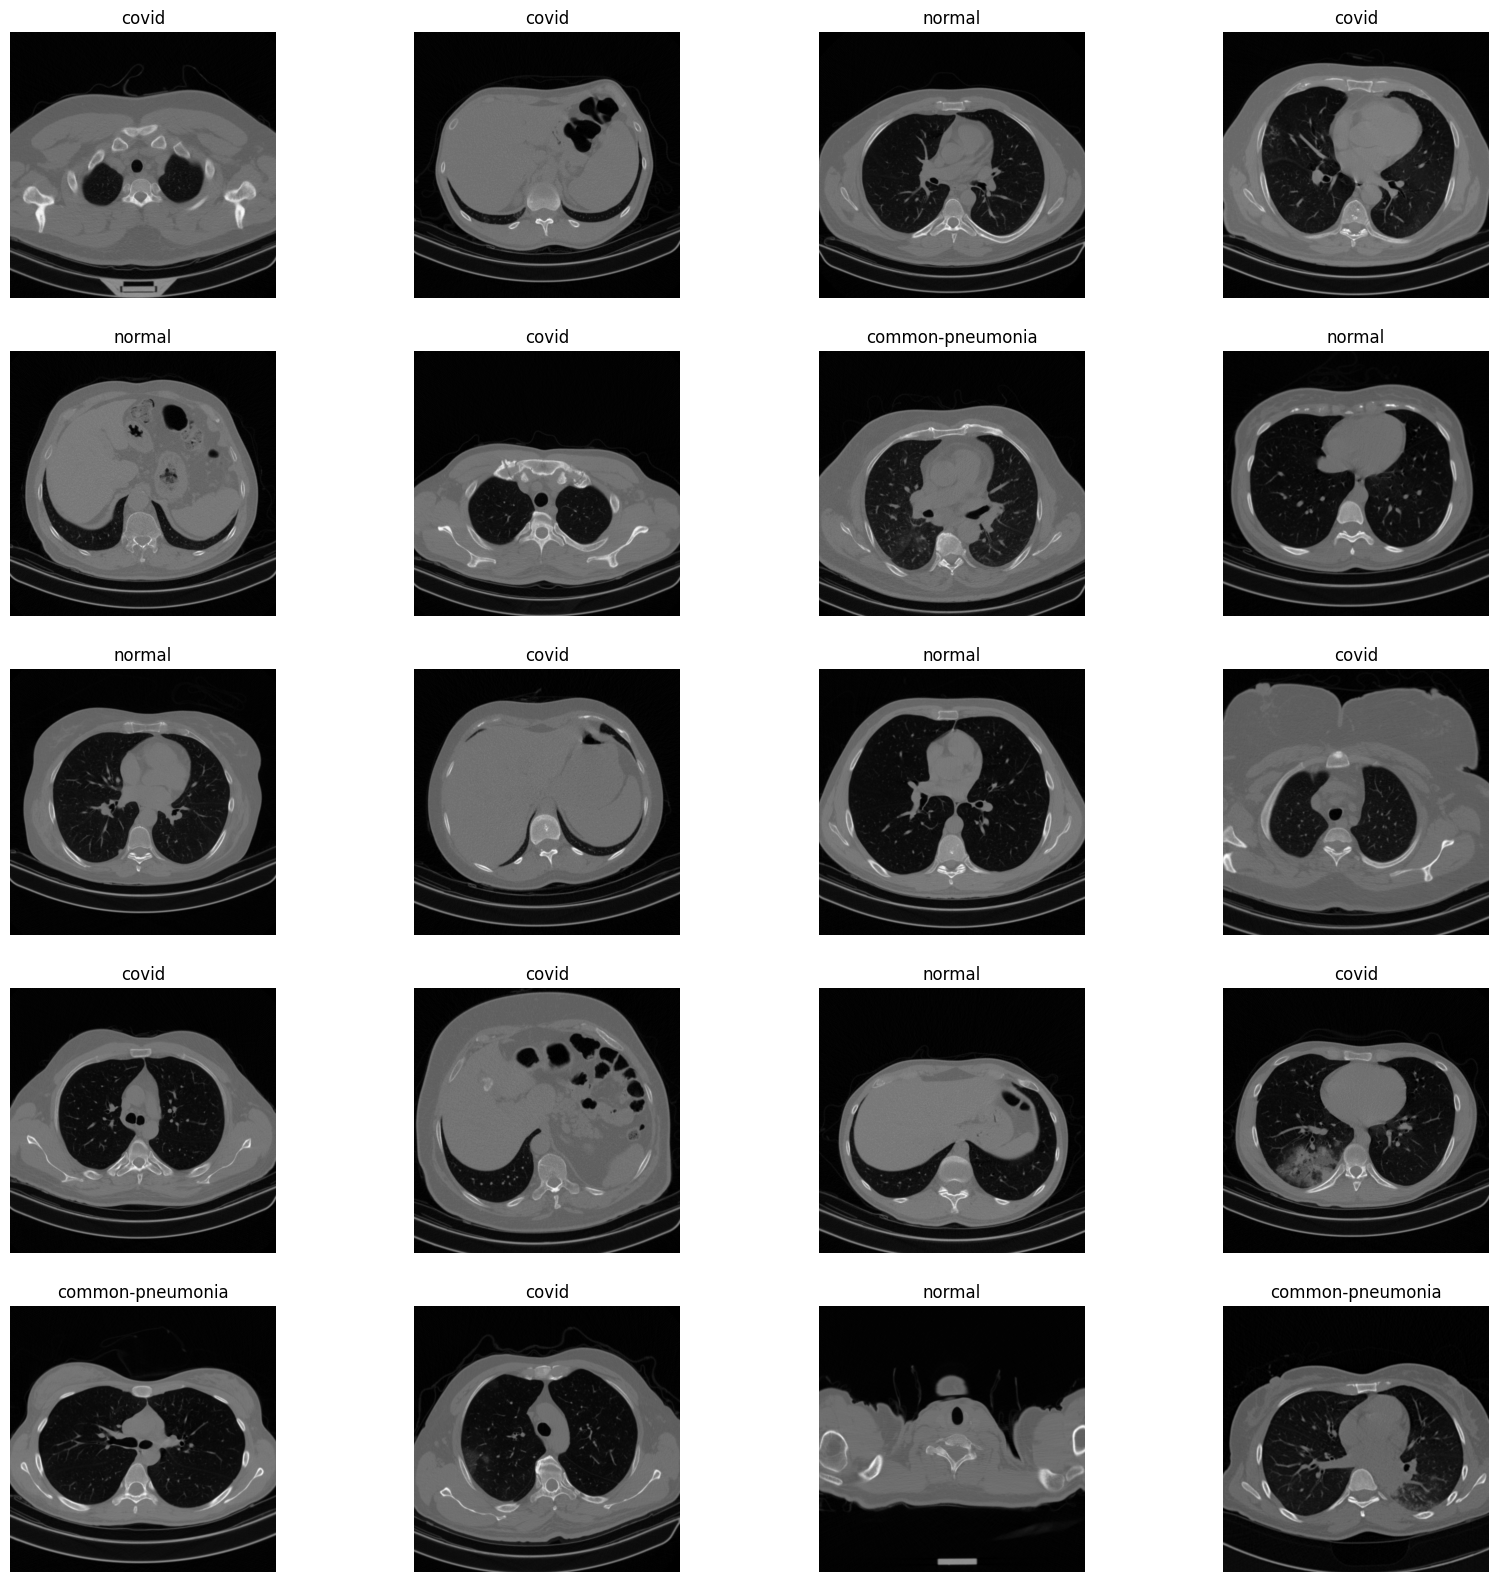

In [17]:

# Define the number of samples to plot
num_samples = 20

# Get a random sample of the data
samples = df.sample(num_samples)

# Define the figure size
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# Iterate through the sample data and plot each image
for index, sample in enumerate(samples.iterrows()):
    row = sample[1]
    dataset = dcmread(row['ct_slice_path'])
    ax = axes[index // 4, index % 4]
    ax.imshow(dataset.pixel_array, "gray")
    ax.set_title(row['Label'])
    ax.axis('off')

# Display the figure
plt.show()


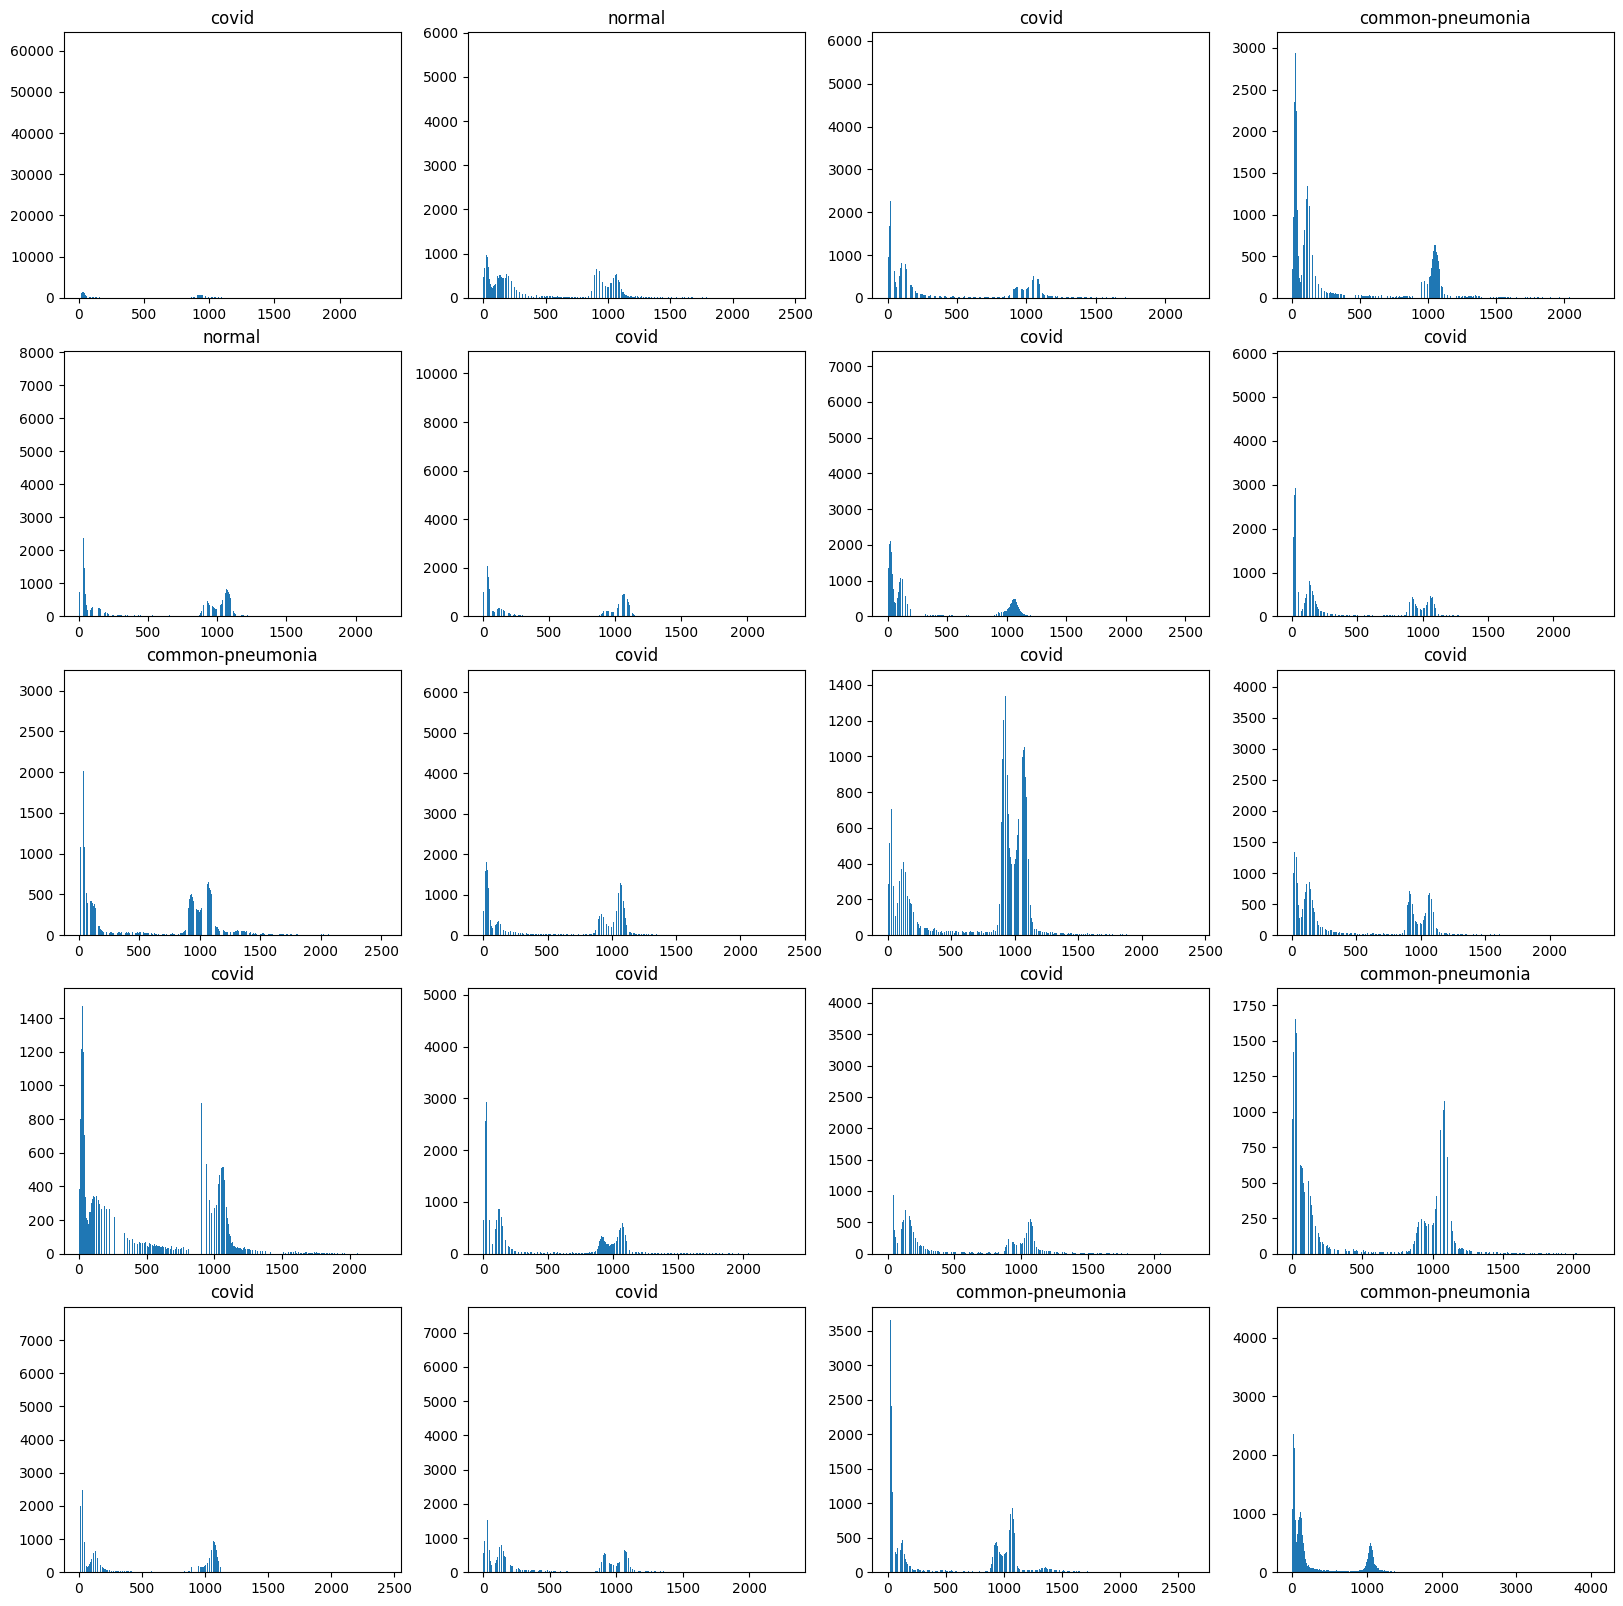

In [30]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for index, sample in enumerate(samples.iterrows()):
    row = sample[1]
    dataset = dcmread(row['ct_slice_path'],)
    ax = axes[index // 4, index % 4]
    ax.hist(dataset.pixel_array.ravel(), bins=4098)
    ax.set_title(row['Label'])

# Display the figure
plt.show()

In [31]:
samples = df[df["label"]=="common-pneumonia"].sort_values(["patient_id", "slice_index"]).reset_index(drop=True)
sample_list = slice_level_labels[0,:]
print(sample_list)
indexes = np.where(sample_list > 0)[0]
print(indexes)
samples.head()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[26 27 28 29 32 33 34 35 36 37 38 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 72 73 74 75 90 91 92 93 94 95 96 97]


,patient_id,label,slice_index,n_slices,ct_slice_path
0,001,common-pneumonia,001,168,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...
1,001,common-pneumonia,002,168,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...
2,001,common-pneumonia,003,168,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...
3,001,common-pneumonia,004,168,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...
4,001,common-pneumonia,005,168,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19...


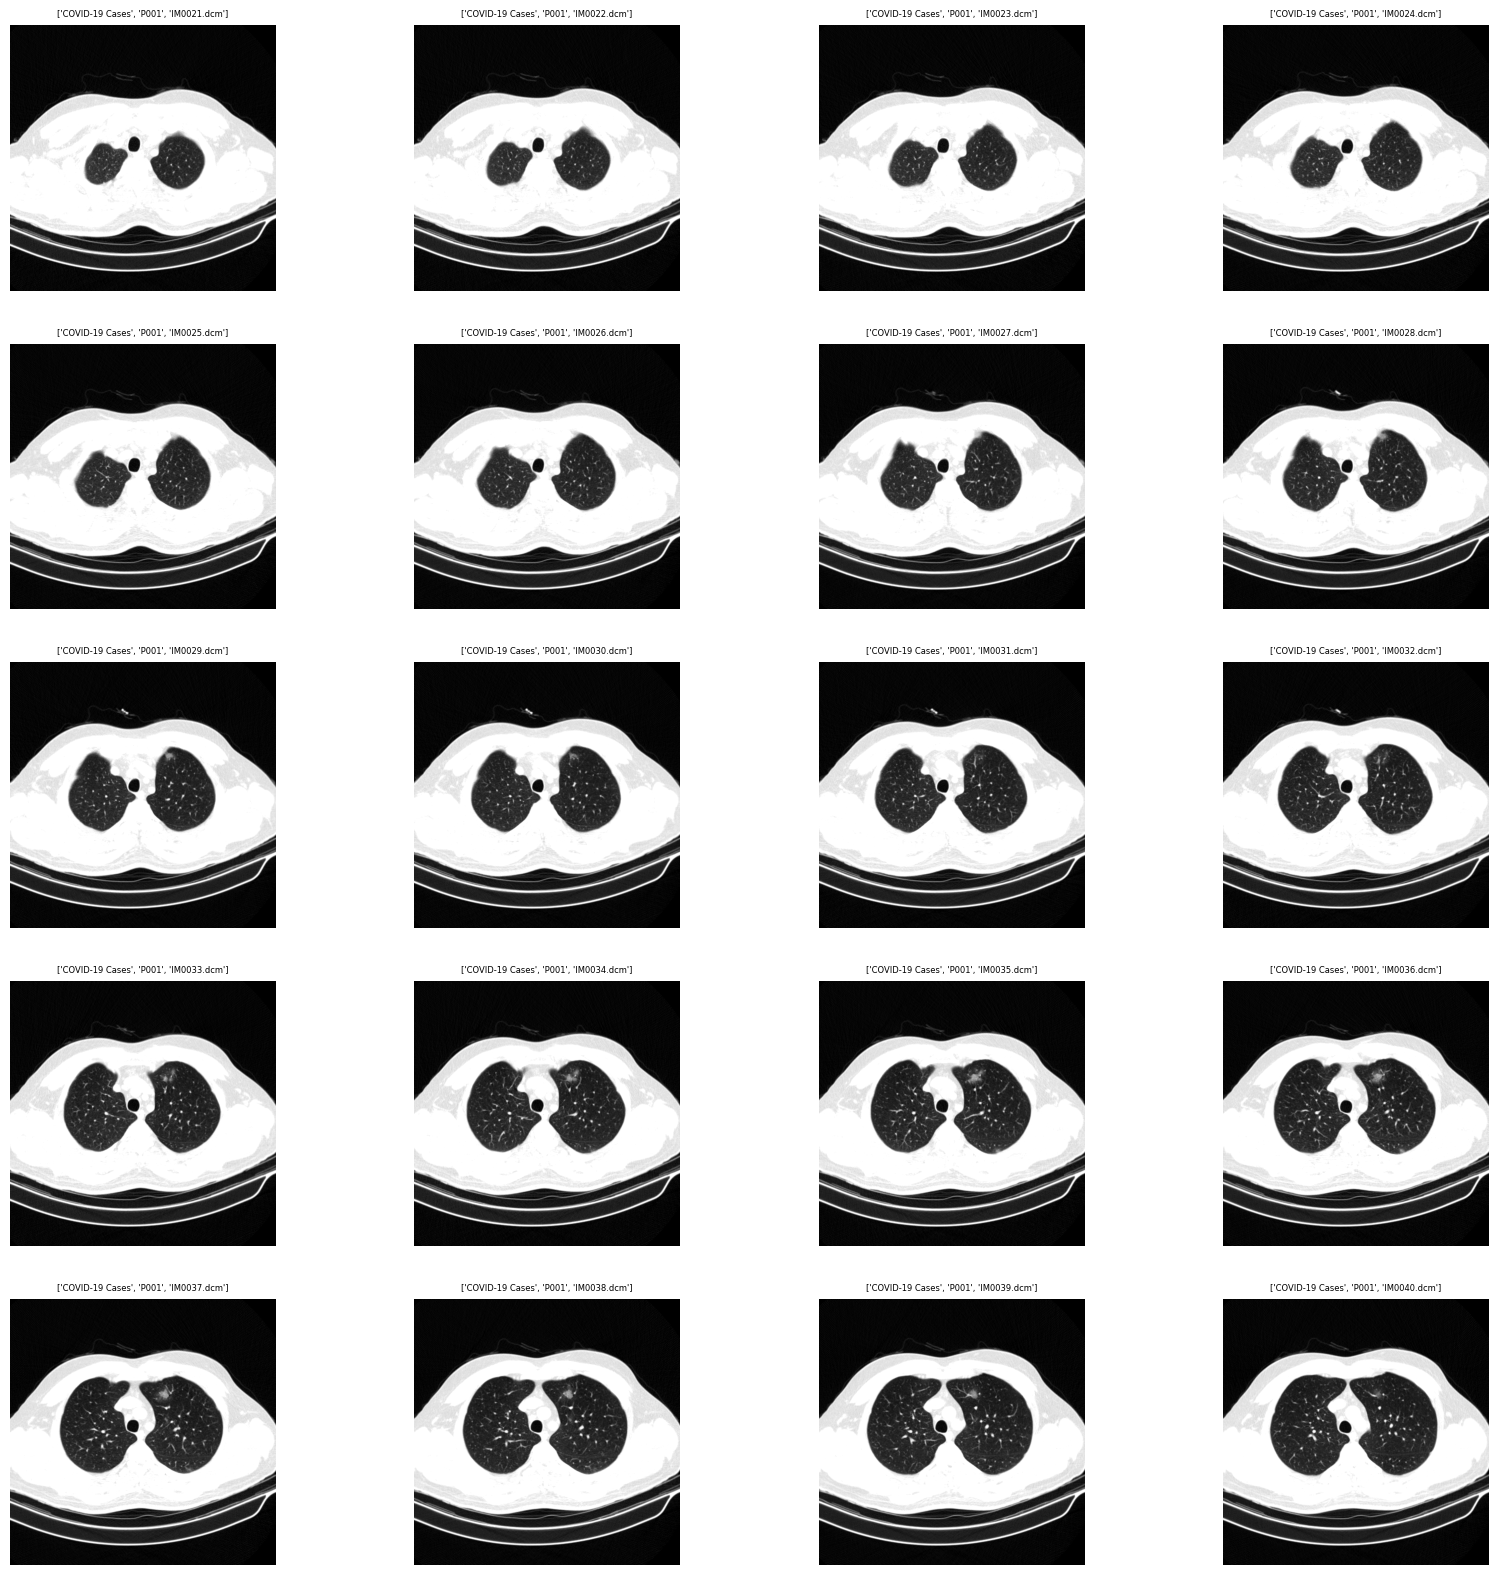

In [52]:
importlib.reload(Utils)
num_samples = 20
# Get a random sample of the data
#samples = df.sample(num_samples)
samples = ct_slices_with_labels_df[ct_slices_with_labels_df["label"]=="covid"].sort_values(["patient_id", "slice_index"])
samples = samples.iloc[20:40]
# Define the figure size
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
# Iterate through the sample data and plot each image
for index, sample in enumerate(samples.iterrows()):
    row = sample[1]
    ct = Utils.read_dicom((row['ct_slice_path']), voi_lut=True, modality_lut=True, view_index=1, fix_monochrome=True, window=False, rescale=True)
    ax = axes[index // 4, index % 4]
    ax.imshow(ct, "gray")
    ax.set_title(row["ct_slice_path"].split("/")[-3:], fontsize=6)
    ax.axis('off')
# Display the figure
plt.show()
